## EDA

Lisa Fung, 8/3/24

### Read Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import geopandas as gpd
from shapely.geometry import Point

In [3]:
acs_df = pd.read_csv("../Data/acs_5yr_est_selected_economic_characteristics_2010-2022.csv")
commodities_df = pd.read_csv("../Data/all_commodities_fixed.csv")
stocks_prices_df = pd.read_csv("../Data/all_stock_and_etfs.csv")
meat_store_df = pd.read_csv("../Data/Meat_Stats_Cold_Storage.csv")
meat_prod_df = pd.read_csv("../Data/Meat_Stats_Meat_Production.csv")
meat_scounts_df = pd.read_csv("../Data/Meat_Stats_Slaughter_Counts.csv")
meat_sweights_df = pd.read_csv("../Data/Meat_Stats_Slaughter_Weights.csv") # 1983-2023
health_df = pd.read_csv("../Data/Nutrition_Physical_Activity_and_Obesity_Data.csv")
stocks_info_df = pd.read_csv("../Data/stock_descriptions.csv")

C:\Users\lisaf\AppData\Local\Temp\ipykernel_17940\1812283153.py:8: DtypeWarning: Columns (18,19,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  health_df = pd.read_csv("../Data/Nutrition_Physical_Activity_and_Obesity_Data.csv")


In [16]:
# commodities_df['Commodity'].unique()
# stocks_prices_df['Ticker_Symbol'].unique()
# meat_store_df['Animal'].unique()
# meat_scounts_df['Animal'].unique()
# stocks_info_df

## Health Data: Nutrition_Physical_Activity_and_Obesity_Data
Questions:
- Ages: Grade 9-12, Adults 18 and older
- Stratification: 'LocationAbbr', 'Age(years)', 'Education', 'Gender', 'Grade', 'Income', 'Race/Ethnicity'
- Questions: Physical Activity, Obesity/Overweight, Nutrition (Vegetables, fruits, soda/pop)

### EDA Health


In [70]:
health_df[['QuestionID', 'Question']].value_counts()
# health_df['StratificationCategory1'].value_counts()
# health_df['Stratification1'].value_counts()
# len(health_df['YearStart'] == health_df['YearEnd']) == len(health_df) # YearStart = YearEnd for all

QuestionID  Question                                                                                                                                                                                                                                             
Q036        Percent of adults aged 18 years and older who have obesity                                                                                                                                                                                               18117
Q037        Percent of adults aged 18 years and older who have an overweight classification                                                                                                                                                                          18117
Q047        Percent of adults who engage in no leisure-time physical activity                                                                                                                                   

In [18]:
health_df.columns
# health_df['Age(years)'].value_counts()

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Grade',
       'Income', 'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID',
       'QuestionID', 'DataValueTypeID', 'LocationID',
       'StratificationCategory1', 'Stratification1',
       'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [19]:
SOCIO_COLS = ['Age(years)', 'Education', 'Gender', 'Grade', 'Income', 'Race/Ethnicity']
# health_df[health_df['Age(years)'].notna()][['Datasource', 'Question', 'LocationAbbr'] + SOCIO_COLS]['LocationAbbr'].value_counts()

In [20]:
health_df.iloc[0]

YearStart                                                                  2019
YearEnd                                                                    2019
LocationAbbr                                                                 AK
LocationDesc                                                             Alaska
Datasource                              Youth Risk Behavior Surveillance System
Class                                                         Physical Activity
Topic                                              Physical Activity - Behavior
Question                      Percent of students in grades 9-12 who achieve...
Data_Value_Unit                                                             NaN
Data_Value_Type                                                           Value
Data_Value                                                                  9.6
Data_Value_Alt                                                              9.6
Data_Value_Footnote_Symbol              

### Health GIS Visualization Work

In [83]:
# Obesity, Overweight
# Percent of adults aged 18 years and older who have an overweight classification
health_weight_df = health_df[health_df['ClassID'] == 'OWS'].copy()

In [84]:
health_weight_df.Question.value_counts()

Question
Percent of adults aged 18 years and older who have obesity                         18117
Percent of adults aged 18 years and older who have an overweight classification    18117
Percent of students in grades 9-12 who have obesity                                 5614
Percent of students in grades 9-12 who have an overweight classification            5614
Name: count, dtype: int64

In [102]:
# [['LocationAbbr'] + SOCIO_COLS]
# Q036 = 'Percent of adults aged 18 years and older who have obesity'

health_q36_df = health_weight_df[health_weight_df['QuestionID'] == 'Q036'].copy()
health_q36_df['YearStart'].value_counts() # 2011 - 2022

q36_vars = {'YearStart' : 2022, 
            'StratificationCategory1' : 'Total', 
            'Stratification1' : 'Total'}

q36_mask = (health_q36_df['YearStart'] == q36_vars['YearStart']) & (health_q36_df['StratificationCategory1'] == q36_vars['StratificationCategory1']) & (health_q36_df['Stratification1'] == q36_vars['Stratification1'])

print(health_q36_df[q36_mask].columns)
# Drop later: US overall data point
health_q36_df[q36_mask].loc[health_q36_df[q36_mask]['LocationAbbr'] == 'US']

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Grade',
       'Income', 'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID',
       'QuestionID', 'DataValueTypeID', 'LocationID',
       'StratificationCategory1', 'Stratification1',
       'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')


,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
132675,2022,2022,US,National,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q036,VALUE,59,Total,Total,OVR,OVERALL


Text(92.22222222222221, 0.5, 'Latitude')

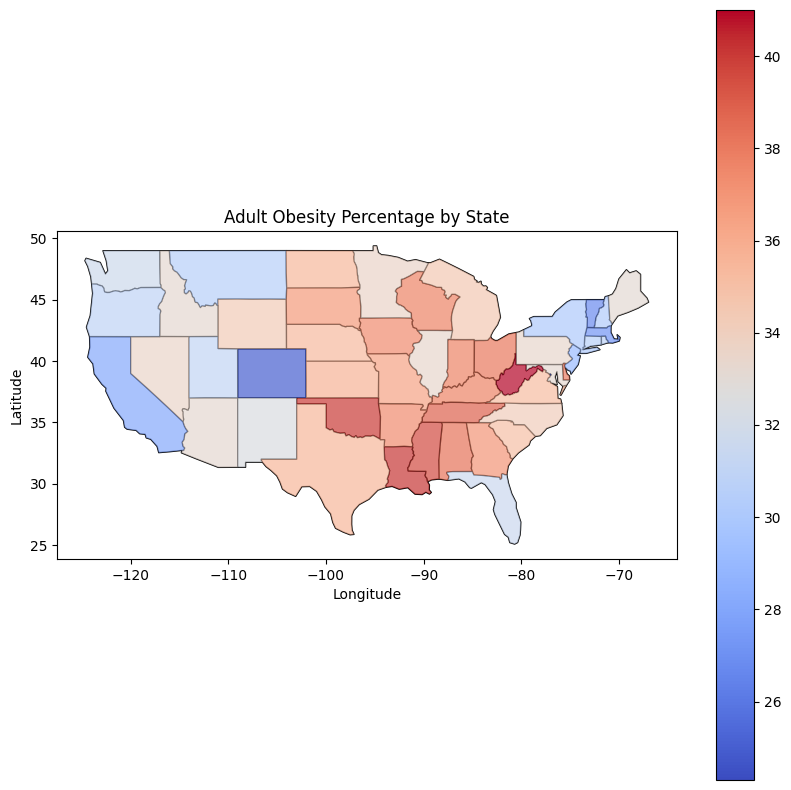

In [303]:
# Visualize
# Heatmap by percentage of obesity by state, for given year, using 'Total'

# Remove US and non Continental US
ISLANDS = ['GU', 'PR', 'VI', 'AK', 'HI']
health_q36_visual = health_q36_df[q36_mask].copy()
health_q36_visual = health_q36_visual[~health_q36_visual['LocationAbbr'].isin(['US'] + ISLANDS)]

# Convert to GeoDF
# Note: Health data has Reversed latitude, longitude!
geometry = [Point(xy.strip("()").split(',')[1], xy.strip("()").split(',')[0]) for xy in health_q36_visual['GeoLocation']]
health_q36_geo_df = gpd.GeoDataFrame(health_q36_visual, geometry=geometry, crs='EPSG:4326') # WGS84

# Load base map of US states
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# us = gpd.read_file('../Geodata/CB_2018/cb_2018_us_state_5m.shp')
us = gpd.read_file('../Geodata/NE_110m/ne_110m_admin_1_states_provinces.shp')
# us = gpd.read_file('../Geodata/TL_2023/tl_2023_us_state.shp')

# Remove Alaska (50), Hawaii (3)
us.drop([3, 50], inplace=True)

# Convert CRS of shapefile to WGS84 (EPSG:4326)
us = us.set_crs('EPSG:4326', allow_override=True)
us = us.to_crs(epsg=4326)

# Merge df on State
merged_df = us.merge(health_q36_geo_df, left_on='name', right_on='LocationDesc', how='left')
merged_df.set_geometry("geometry_x", inplace=True)

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
base = us.plot(ax=ax, color='white', edgecolor='black')
merged_df.plot(column='Data_Value', ax=base, legend=True, cmap='coolwarm', alpha=0.7)
# health_q36_geo_df.plot(ax=base, color='red', markersize=health_q36_geo_df['Data_Value'], alpha=0.5)
plt.title('Adult Obesity Percentage by State')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# plt.show()

# plt.savefig('Figures/Q036_Obesity_State_RedBlue_v1.png')

In [283]:
print(health_q36_geo_df.Question.unique())
health_q36_geo_df[['LocationDesc', 'Data_Value']].sort_values(by='Data_Value', ascending=False)

['Percent of adults aged 18 years and older who have obesity']


,LocationDesc,Data_Value
133194,West Virginia,41.0
130441,Louisiana,40.1
131979,Oklahoma,40.0
131044,Mississippi,39.5
132508,Tennessee,38.9
128946,Alabama,38.3
131903,Ohio,38.1
129534,Delaware,37.9
130205,Indiana,37.7
130390,Kentucky,37.7


### Generate Map

In [29]:
def health_map(data_df, fig_title):
    # Visualize
    # Heatmap by percentage of obesity by state, for given year, using 'Total'
    
    # Convert to GeoDF
    # Note: Health data has Reversed latitude, longitude!
    geometry = [Point(xy.strip("()").split(',')[1], xy.strip("()").split(',')[0]) for xy in data_df['GeoLocation']]
    data_geo_df = gpd.GeoDataFrame(data_df, geometry=geometry, crs='EPSG:4326') # WGS84
    
    # Load base map of US states
    # world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    # us = gpd.read_file('../Geodata/CB_2018/cb_2018_us_state_5m.shp')
    us = gpd.read_file('../Geodata/NE_110m/ne_110m_admin_1_states_provinces.shp')
    # us = gpd.read_file('../Geodata/TL_2023/tl_2023_us_state.shp')
    
    # Remove Alaska (50), Hawaii (3)
    us.drop([3, 50], inplace=True)
    
    # Convert CRS of shapefile to WGS84 (EPSG:4326)
    us = us.set_crs('EPSG:4326', allow_override=True)
    us = us.to_crs(epsg=4326)
    
    # Merge df on State
    merged_df = us.merge(data_geo_df, left_on='name', right_on='LocationDesc', how='left')
    merged_df.set_geometry("geometry_x", inplace=True)
    
    # Plot
    fig, ax = plt.subplots(figsize=(10, 10))
    base = us.plot(ax=ax, color='white', edgecolor='black')
    merged_df.plot(column='Data_Value', ax=base, legend=True, cmap='coolwarm', alpha=0.7)
    # health_q36_geo_df.plot(ax=base, color='red', markersize=health_q36_geo_df['Data_Value'], alpha=0.5)
    plt.title(fig_title)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    # plt.show()
    
    plt.savefig(f'Figures/{fig_title}.png')

In [14]:
health_df[['Question', 'QuestionID']].value_counts()

Question                                                                                                                                                                                                                                               QuestionID
Percent of adults aged 18 years and older who have an overweight classification                                                                                                                                                                        Q037          18117
Percent of adults aged 18 years and older who have obesity                                                                                                                                                                                             Q036          18117
Percent of adults who engage in no leisure-time physical activity                                                                                                                                               

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Grade',
       'Income', 'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID',
       'QuestionID', 'DataValueTypeID', 'LocationID',
       'StratificationCategory1', 'Stratification1',
       'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')


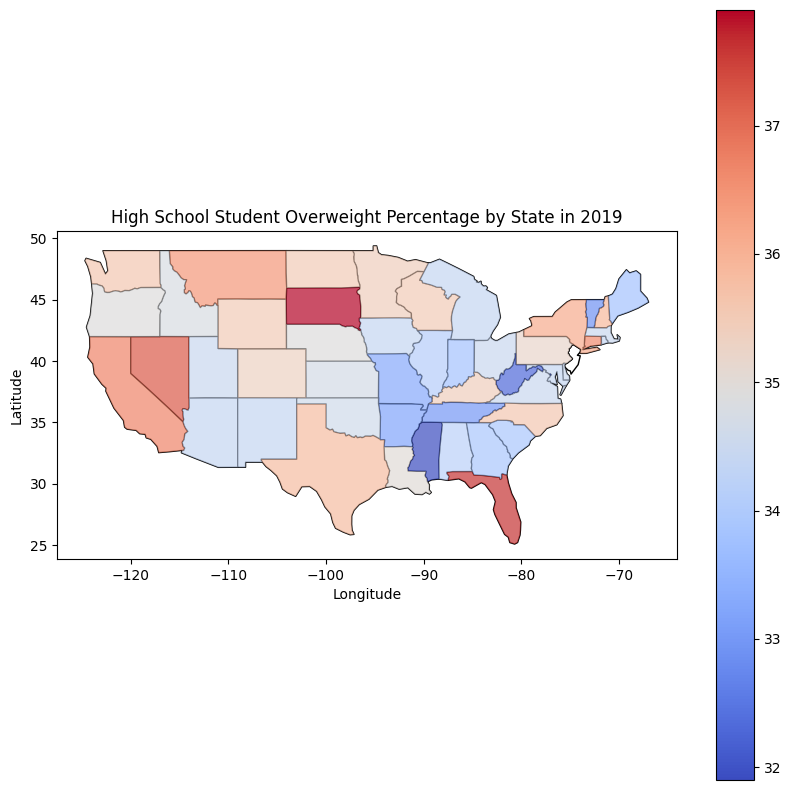

In [39]:
# Formulate Data
# [['LocationAbbr'] + SOCIO_COLS]
# Q036 = 'Percent of adults aged 18 years and older who have obesity'

health_vars = {
    'QuestionID' : 'Q037',
    'YearStart' : 2019, 
    'StratificationCategory1' : 'Total', 
    'Stratification1' : 'Total'
}

health_visual_df = health_df[health_df['QuestionID'] == health_vars['QuestionID']].copy()

health_mask = (health_visual_df['YearStart'] == health_vars['YearStart']) & (health_visual_df['StratificationCategory1'] == health_vars['StratificationCategory1']) & (health_visual_df['Stratification1'] == health_vars['Stratification1'])

# Drop later: US overall data point
# health_q36_df[q36_mask].loc[health_q36_df[q36_mask]['LocationAbbr'] == 'US']

# Remove US and non Continental US
ISLANDS = ['GU', 'PR', 'VI', 'AK', 'HI']
health_visual_df = health_visual_df[health_mask].copy()
print(health_visual_df.columns)
health_visual_df = health_visual_df[~health_visual_df['LocationAbbr'].isin(['US'] + ISLANDS)]

# Call function to produce map, saved as "./Figures/{fig_title}.png"
health_map(
    data_df = health_visual_df,
    fig_title = "High School Student Overweight Percentage by State in 2019"
)

In [40]:
health_visual_df[['LocationAbbr', 'Data_Value']].sort_values(by='Data_Value', ascending=False)
# health_df[health_df['QuestionID'] == health_vars['QuestionID']]['YearStart'].unique()
# 'LocationAbbr', 'Data_Value', 
# .sort_values(by='Data_Value', ascending=False)

,LocationAbbr,Data_Value
76456,SD,37.9
78437,FL,37.6
77632,NV,37.2
84851,CA,36.7
84857,CT,36.6
85695,MT,36.4
80854,NY,36.1
79415,NH,35.9
85638,TX,35.8
91212,WA,35.6
